### UNDERSTANDING THE PROBLEM STATEMENT 

Google and Aravind Eye Hospital work: https://venturebeat.com/2019/02/25/google-works-with-aravind-eye-hospital-to-deploy-ai-that-can-detect-eye-disease/

Data Source: https://www.kaggle.com/c/diabetic-retinopathy-detection

# IMPORT LIBRARIES & DATASETS

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [2]:
from jupyterthemes import jtplot

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
jtplot.style(ticks=True, grid=False)


In [4]:
# list all the files and directories
os.listdir('./train')

['Mild', 'Moderate', 'Proliferate_DR', 'Severe', 'No_DR']

In [9]:
import os

# Path to the main directory
main_directory = './train'

# Count the number of files in each subdirectory
class_file_counts = {
    subdir: len(os.listdir(os.path.join(main_directory, subdir)))
    for subdir in os.listdir(main_directory)
    if os.path.isdir(os.path.join(main_directory, subdir))
}

# Print the results
for class_name, count in class_file_counts.items():
    print(f"Class: {class_name}, Number of Files: {count}")


Class: Mild, Number of Files: 370
Class: Moderate, Number of Files: 999
Class: Proliferate_DR, Number of Files: 295
Class: Severe, Number of Files: 193
Class: No_DR, Number of Files: 1805


In [5]:
for item in os.listdir('./train'):
    if os.path.isdir(os.path.join('./train', item)):
        print(f"{item} is a directory")
    else:
        print(f"{item} is a file")


Mild is a directory
Moderate is a directory
Proliferate_DR is a directory
Severe is a directory
No_DR is a directory


In [12]:
os.listdir(os.path.join('train', 'Mild'))

['2d7666b8884f.png',
 '50840c36f0b4.png',
 '30cab14951ac.png',
 'a8582e346df0.png',
 'cab3dfa7962d.png',
 '35d6c4c50072.png',
 '67f5d89da548.png',
 '6b07971c3bf6.png',
 '7116128c65ab.png',
 'e38f3a65b02b.png',
 'd85588ff2ebd.png',
 'a19ecd0a706e.png',
 '49c5e7f6b8d2.png',
 '2f2e1949ad56.png',
 '35aa7f5c2ec0.png',
 '55eac26bd383.png',
 'af133a85ea0c.png',
 '80a02014b418.png',
 '384631079d1e.png',
 'e25ccfe38e44.png',
 '6ea07d19b4ce.png',
 '8273fdb4405e.png',
 'ead23cc922ed.png',
 '1e8a1fdee5b9.png',
 'c102db7634d8.png',
 '1b329a127307.png',
 '0f495d87656a.png',
 '58184d6fd087.png',
 '25e9fd872182.png',
 'c4a8f2fcf6e8.png',
 'ee78ce914066.png',
 'e9ff9352ccb3.png',
 'cb2f3c5d71a7.png',
 '5090917a2676.png',
 '79ce83c07588.png',
 'dbd062558b81.png',
 '5671eb95512b.png',
 '00cb6555d108.png',
 '96a9706b8534.png',
 'ea15a290eb96.png',
 '36677b70b1ef.png',
 'eba3acc42197.png',
 'f481f76a6b75.png',
 'f6f7dba7104d.png',
 '821789e9053f.png',
 'a75bab2463d4.png',
 '6028a575dc27.png',
 'a47432cd41e

## Checking the number of images in the dataset


In [13]:
import os
import glob

train = []
label = []

# glob.glob returns the list of files with the specified pattern
for class_dir in glob.glob('./train/*'):
    class_name = os.path.basename(class_dir)
    # Only add files with image extensions
    for img_file in glob.glob(os.path.join(class_dir, '*.[pjJ][npP][gG]')):
        train.append(img_file)
        label.append(class_name)

print('Number of train images are : {} \n'.format(len(train)))


Number of train images : 3662 



In [14]:
train

['./train/Mild/2d7666b8884f.png',
 './train/Mild/50840c36f0b4.png',
 './train/Mild/30cab14951ac.png',
 './train/Mild/a8582e346df0.png',
 './train/Mild/cab3dfa7962d.png',
 './train/Mild/35d6c4c50072.png',
 './train/Mild/67f5d89da548.png',
 './train/Mild/6b07971c3bf6.png',
 './train/Mild/7116128c65ab.png',
 './train/Mild/e38f3a65b02b.png',
 './train/Mild/d85588ff2ebd.png',
 './train/Mild/a19ecd0a706e.png',
 './train/Mild/49c5e7f6b8d2.png',
 './train/Mild/2f2e1949ad56.png',
 './train/Mild/35aa7f5c2ec0.png',
 './train/Mild/55eac26bd383.png',
 './train/Mild/af133a85ea0c.png',
 './train/Mild/80a02014b418.png',
 './train/Mild/384631079d1e.png',
 './train/Mild/e25ccfe38e44.png',
 './train/Mild/6ea07d19b4ce.png',
 './train/Mild/8273fdb4405e.png',
 './train/Mild/ead23cc922ed.png',
 './train/Mild/1e8a1fdee5b9.png',
 './train/Mild/c102db7634d8.png',
 './train/Mild/1b329a127307.png',
 './train/Mild/0f495d87656a.png',
 './train/Mild/58184d6fd087.png',
 './train/Mild/25e9fd872182.png',
 './train/Mild

In [15]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

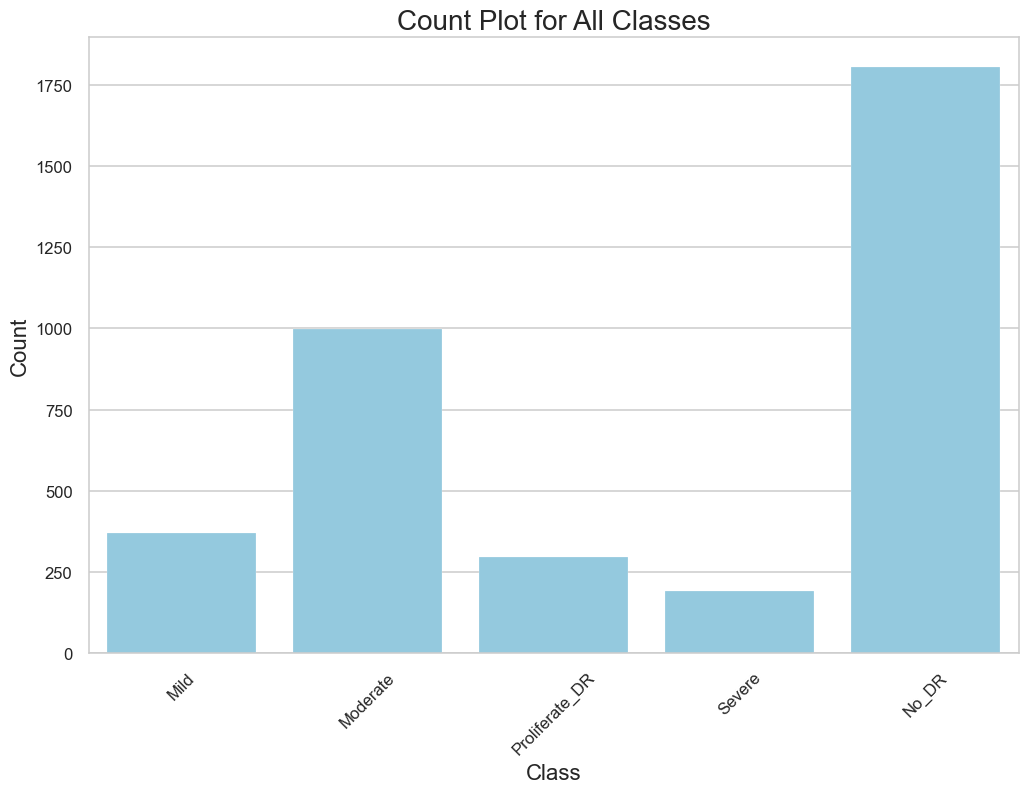

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the list of labels into a pandas Series
label_series = pd.Series(label)

# Set a single color for all bars
color = "skyblue"

# Create the countplot
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
ax = sns.countplot(x=label_series, color=color)

# Enhance the plot
plt.title('Count Plot for All Classes', fontsize=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


# DATA EXPLORATION AND DATA VISUALIZATION

### Visualizing 5 images for each class in the dataset

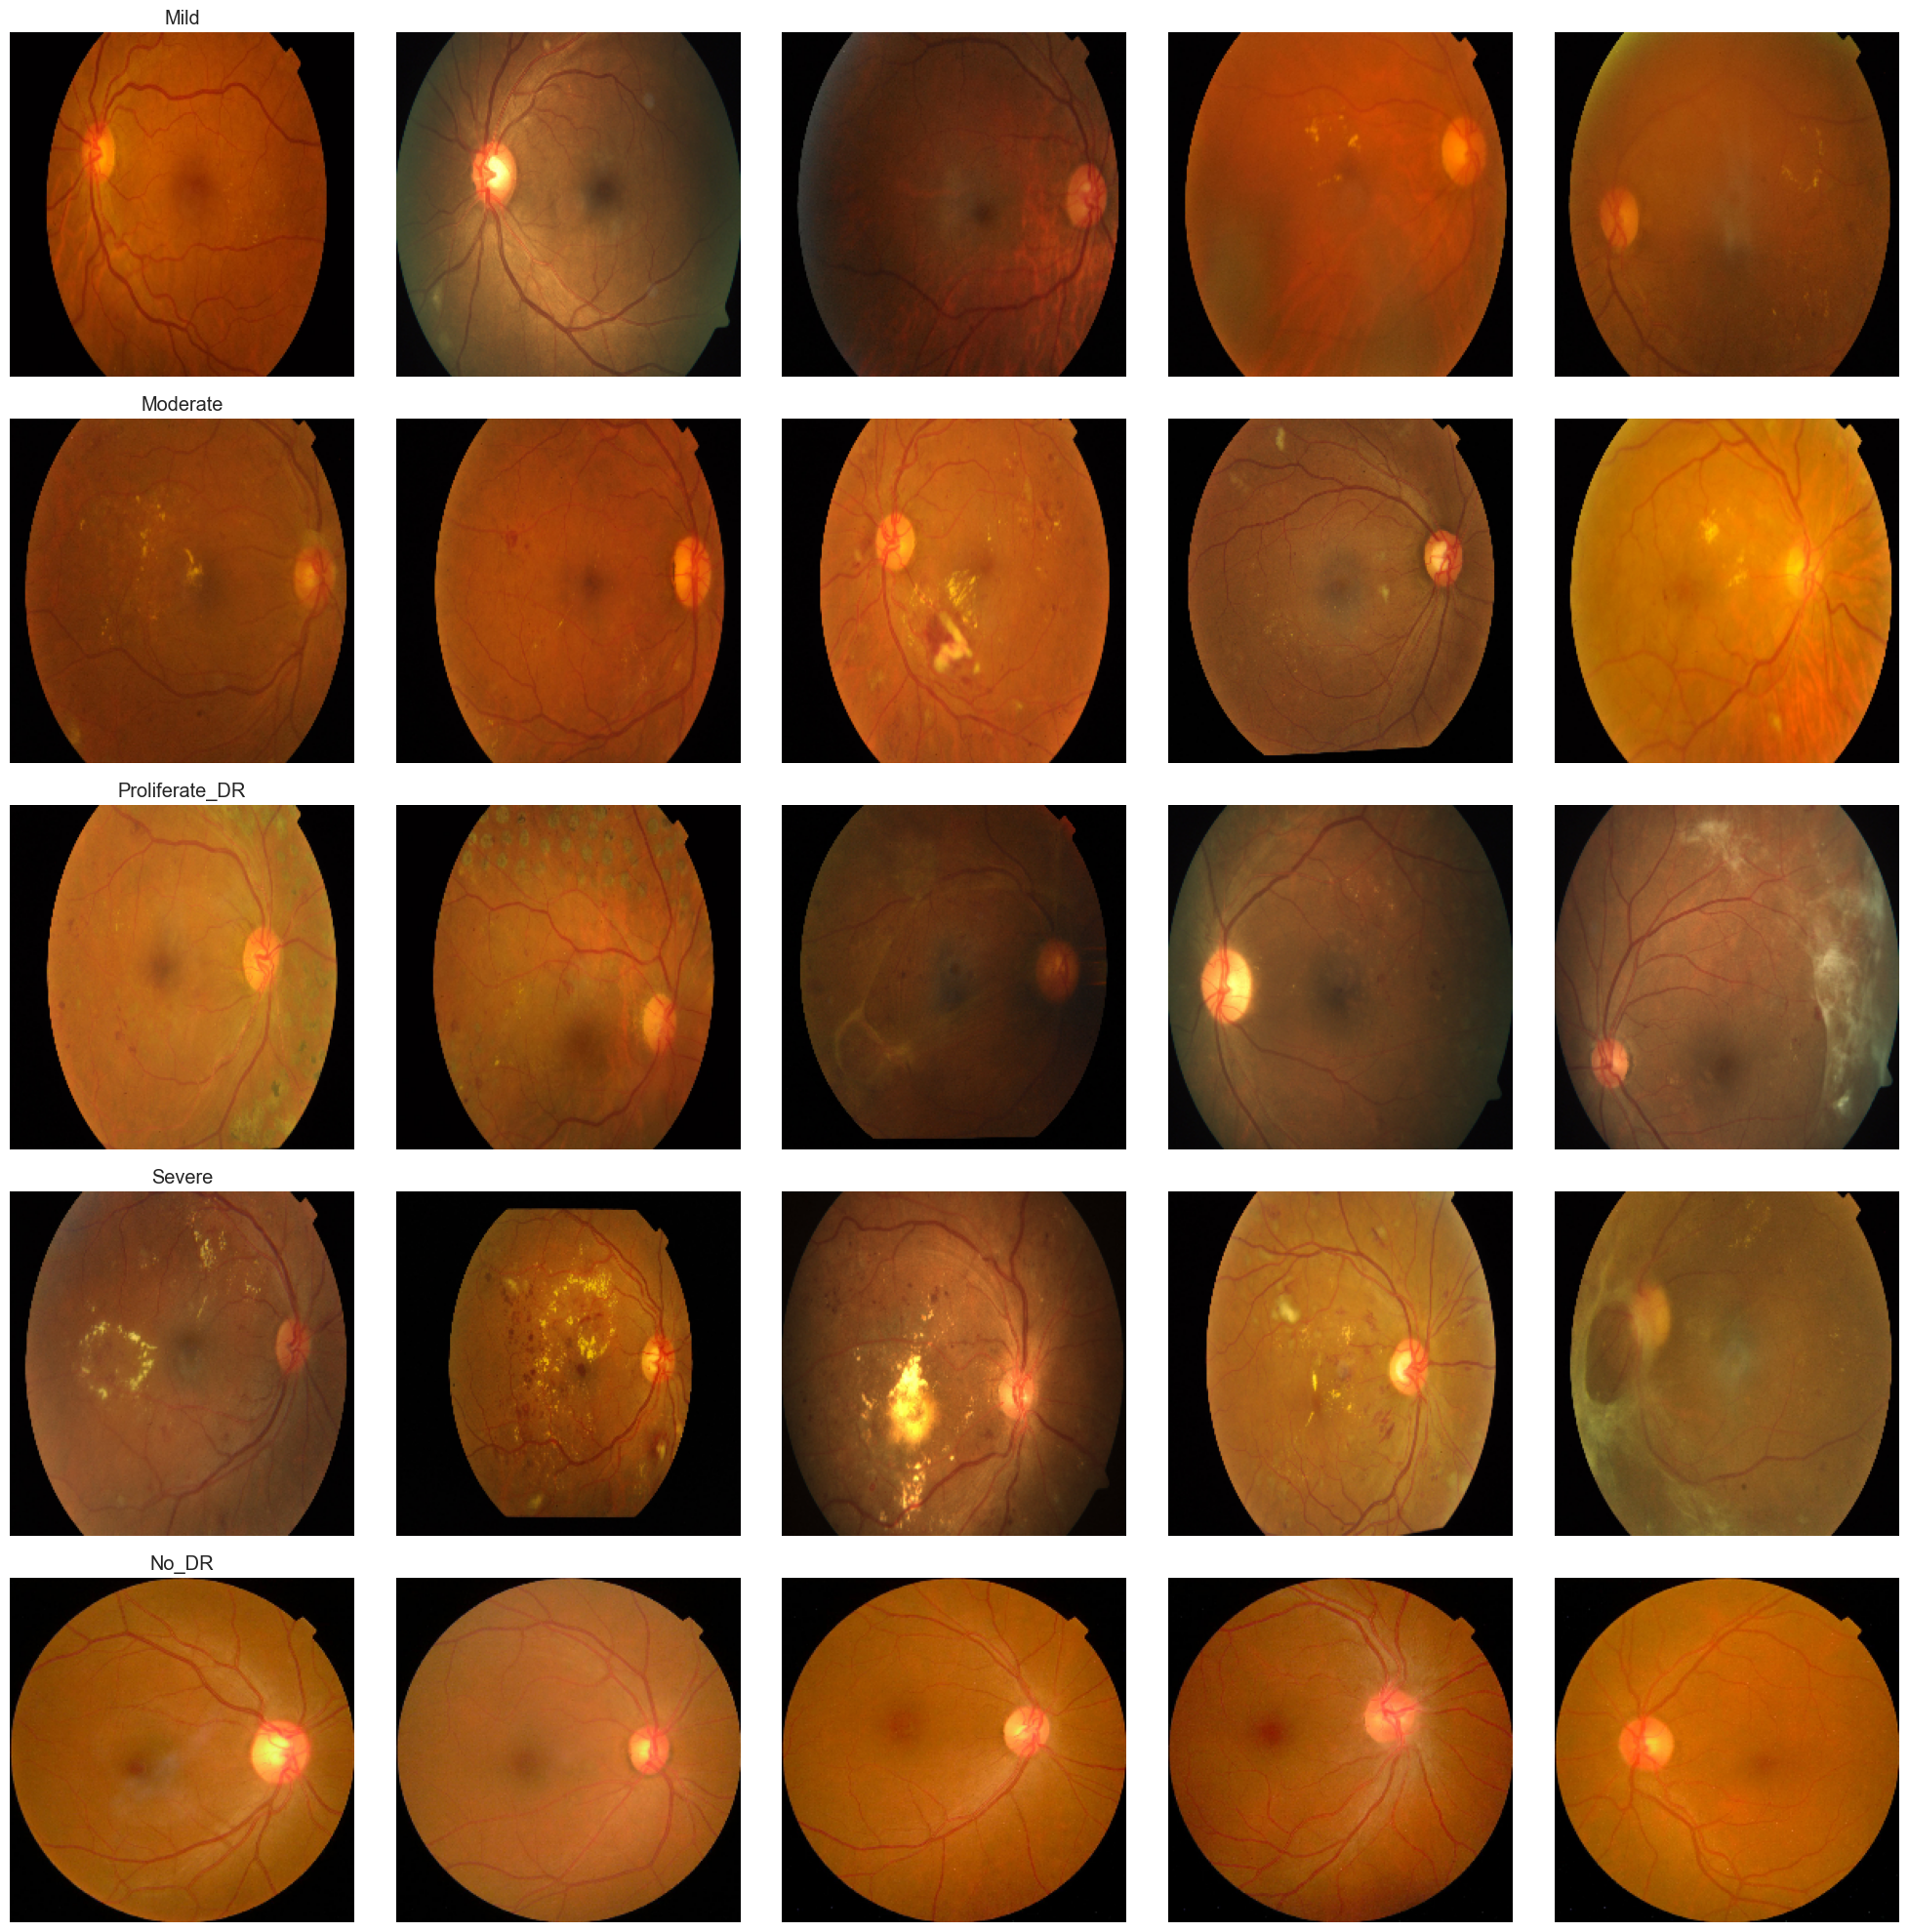

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the number of samples per class and the number of classes
samples_per_class = 5
num_classes = len(os.listdir('./train'))

# Create subplots
fig, axs = plt.subplots(num_classes, samples_per_class, figsize=(20, 20))

# Loop over each class directory
for count, class_dir in enumerate(os.listdir('./train')):
    # Get the list of images in the class directory
    train_class = os.listdir(os.path.join('./train', class_dir))
    
    # Loop over each image up to the sample limit
    for j in range(samples_per_class):
        # Open the image
        img_path = os.path.join('./train', class_dir, train_class[j])
        img = Image.open(img_path)
        
        # Plot the image
        axs[count, j].imshow(img)
        axs[count, j].axis('off')  # Hide axes for better visualization
        if j == 0:
            axs[count, j].set_title(class_dir)  # Set the class name as title for the first image of each row

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()


### Checking the number of img in each class in the dataset


In [24]:
# Get the list of classes
classes = os.listdir('./train')

# Use list comprehension to get the number of images in each class
num_images = [len(os.listdir(os.path.join('./train', i))) for i in classes]

# Print the number of images in each class
for i, num in zip(classes, num_images):
    print(f'Number of images in {i} = {num}')


Number of images in Mild = 370
Number of images in Moderate = 999
Number of images in Proliferate_DR = 295
Number of images in Severe = 193
Number of images in No_DR = 1805


In [25]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image Labels
0      ./train/Mild/2d7666b8884f.png   Mild
1      ./train/Mild/50840c36f0b4.png   Mild
2      ./train/Mild/30cab14951ac.png   Mild
3      ./train/Mild/a8582e346df0.png   Mild
4      ./train/Mild/cab3dfa7962d.png   Mild
...                              ...    ...
3657  ./train/No_DR/6b30767595d8.png  No_DR
3658  ./train/No_DR/2b4c7b5f1f1e.png  No_DR
3659  ./train/No_DR/ab78a66dee6a.png  No_DR
3660  ./train/No_DR/79ade634c633.png  No_DR
3661  ./train/No_DR/7a77c3eb468c.png  No_DR

[3662 rows x 2 columns]

### Showing the percentage of samples per class. 

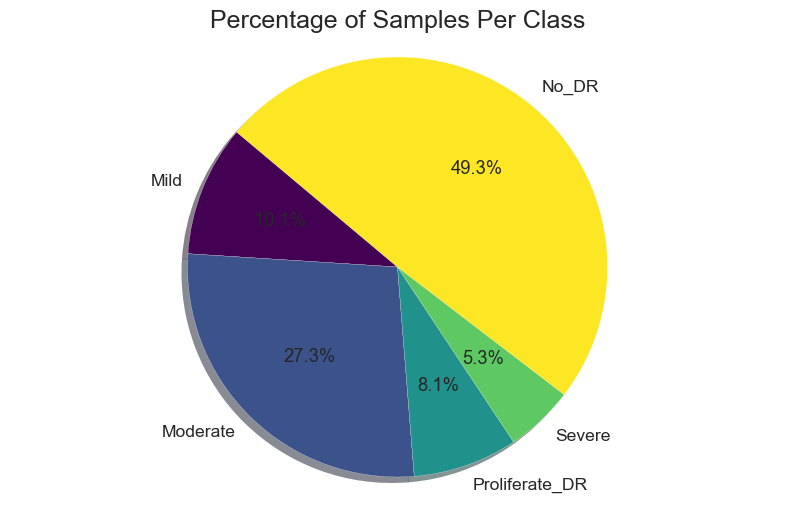

In [28]:
classes = os.listdir('./train')

# Use list comprehension to get the number of images in each class
num_images = [len(os.listdir(os.path.join('./train', i))) for i in classes]

# Calculate the percentage of each class
percentages = [num / sum(num_images) * 100 for num in num_images]

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(classes)))

plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=classes, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Percentage of Samples Per Class', fontsize=18)
plt.axis('equal')

plt.show()


# DATA AUGMENTATION AND CREATE DATA GENERATOR

In [29]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [30]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


### Another image augmentation strategies to the training data.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [35]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

# BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [46]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [47]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_7    │ (None, 262, 262,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 128, 128,  │      9,472 │ zero_padding2d_7… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 128, 128,  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_31       │ (None, 128, 128,  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 63, 63,    │          0 │ activation_31[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 63, 63,    │      4,160 │ max_pooling2d_14… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 31, 31,    │          0 │ res_2_conv_a[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 31, 31,    │        256 │ max_pooling2d_15… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_32       │ (None, 31, 31,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 31, 31,    │     36,928 │ activation_32[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 31, 31,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_33       │ (None, 31, 31,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 63, 63,    │     16,640 │ max_pooling2d_14… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 31, 31,    │     16,640 │ activation_33[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 31, 31,    │          0 │ res_2_conv_copy[… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 31, 31,    │      1,024 │ res_2_conv_c[0][

 Total params: 19,950,213 (76.10 MB)

 Trainable params: 19,907,845 (75.94 MB)

 Non-trainable params: 42,368 (165.50 KB)

# COMPILING AND TRAIN DEEP LEARNING MODEL

In [76]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [79]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Save only the weights of the model with lower validation loss
checkpointer = ModelCheckpoint(filepath='weights.weights.h5', verbose=1, save_best_only=True, save_weights_only=True)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6787 - loss: 0.9283
Epoch 1: val_loss improved from inf to 12.56534, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6789 - loss: 0.9276 - val_accuracy: 0.5000 - val_loss: 12.5653
Epoch 2/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:01 2s/step - accuracy: 0.7188 - loss: 0.8437

2024-06-01 00:23:26.657270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_loss did not improve from 12.56534
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7188 - loss: 0.8437 - val_accuracy: 0.4783 - val_loss: 37.1438
Epoch 3/10


2024-06-01 00:23:26.897387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7232 - loss: 0.8005
Epoch 3: val_loss did not improve from 12.56534
77/77 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7231 - loss: 0.8011 - val_accuracy: 0.2620 - val_loss: 14.7278
Epoch 4/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:06 2s/step - accuracy: 0.6875 - loss: 0.7254

2024-06-01 00:25:45.925957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_loss did not improve from 12.56534
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6875 - loss: 0.7254 - val_accuracy: 0.2609 - val_loss: 17.1778
Epoch 5/10


2024-06-01 00:25:46.161563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7324 - loss: 0.7334
Epoch 5: val_loss improved from 12.56534 to 1.03109, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7323 - loss: 0.7337 - val_accuracy: 0.7019 - val_loss: 1.0311
Epoch 6/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:04 2s/step - accuracy: 0.5625 - loss: 1.7163

2024-06-01 00:28:06.629545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_loss did not improve from 1.03109
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - loss: 1.7163 - val_accuracy: 0.5652 - val_loss: 1.1970
Epoch 7/10


2024-06-01 00:28:06.871682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7333 - loss: 0.7564
Epoch 7: val_loss improved from 1.03109 to 0.81201, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7333 - loss: 0.7562 - val_accuracy: 0.7524 - val_loss: 0.8120
Epoch 8/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:10 2s/step - accuracy: 0.7500 - loss: 0.7812

2024-06-01 00:30:29.179740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_loss improved from 0.81201 to 0.78393, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7500 - loss: 0.7812 - val_accuracy: 0.6957 - val_loss: 0.7839
Epoch 9/10


2024-06-01 00:30:29.427492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7500 - loss: 0.6809
Epoch 9: val_loss did not improve from 0.78393
77/77 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7500 - loss: 0.6810 - val_accuracy: 0.7139 - val_loss: 0.8024
Epoch 10/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:13 2s/step - accuracy: 0.7188 - loss: 0.6500

2024-06-01 00:32:54.685551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_loss did not improve from 0.78393
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7188 - loss: 0.6500 - val_accuracy: 0.7826 - val_loss: 0.8542


2024-06-01 00:32:54.932355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


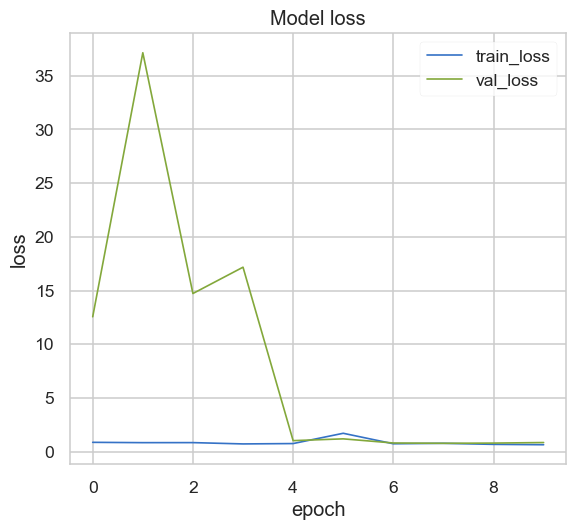

In [80]:
# Train for 10 epochs instead of 1
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 10, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()
